In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, x])

In [2]:
x1 = np.linspace(-5, 5, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, x1])

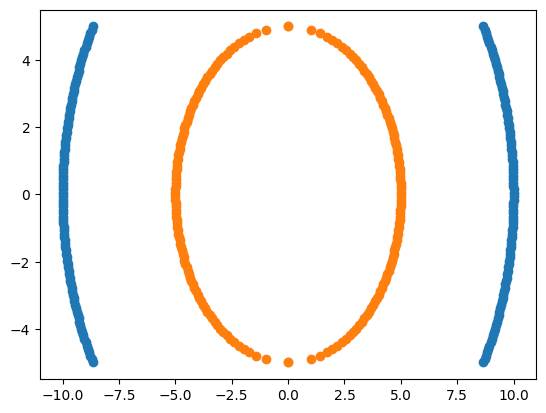

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [7]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [8]:
df.tail()

,X1,X2,Y
395,-1.969049,4.59596,1
396,-1.714198,4.69697,1
397,-1.406908,4.79798,1
398,-0.999949,4.89899,1
399,-0.000000,5.00000,1


In [11]:
X = df.iloc[:,:2]
y = df.Y

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
y_train

247    1
110    0
16     0
66     0
153    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: Y, Length: 300, dtype: int64

In [15]:
# We need to find cpmponents for Polynomial Kernel
df['X1^2'] = df['X1']**2
df['X2^2'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1^2,X2^2,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [16]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
            color='Y')
fig.show()

In [18]:
fig = px.scatter_3d(df, x='X1^2', y='X1^2', z='X1*X2',
            color='Y')
fig.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.69

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.56